In [3]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/Final Year Project/AgeR.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [1]:
import numpy as np
import os
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten ,Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential 
from keras import optimizers
from keras import backend as k

Using TensorFlow backend.


In [0]:
class_names = ['0-7','8-14', '15-19', '20-25', '26-32', '33-40', '41-48','49-55','56-62','62+']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (100, 100)

In [0]:
def load_data():
   
    datasets = ['Age/train', 'Age/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 10)
test_labels =  np_utils.to_categorical(train_labels, 10)

 14%|█▍        | 141/1010 [00:00<00:00, 1400.92it/s]

Loading Age/train


  0%|          | 0/250 [00:00<?, ?it/s]

Loading Age/test


100%|██████████| 228/228 [00:00<00:00, 1513.63it/s]


In [0]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [0]:

model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)), 
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation = 'relu'),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation = 'relu'),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    (Dense(128,activation='relu')),
    Dropout(0.2),
    (Dense(64,activation='relu')),
    Dropout(0.2),
    (Dense(10,activation='softmax'))
])

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=25,shuffle=True, validation_data=(test_images, test_labels), verbose =2)

Train on 10834 samples, validate on 10834 samples
Epoch 1/25
 - 12s - loss: 2.0675 - accuracy: 0.2597 - val_loss: 2.3755 - val_accuracy: 0.1317
Epoch 2/25
 - 10s - loss: 1.6799 - accuracy: 0.3576 - val_loss: 1.9297 - val_accuracy: 0.3013
Epoch 3/25
 - 10s - loss: 1.5141 - accuracy: 0.4041 - val_loss: 1.5725 - val_accuracy: 0.3927
Epoch 4/25
 - 10s - loss: 1.4022 - accuracy: 0.4339 - val_loss: 1.3285 - val_accuracy: 0.4621
Epoch 5/25
 - 10s - loss: 1.3186 - accuracy: 0.4606 - val_loss: 1.3459 - val_accuracy: 0.4465
Epoch 6/25
 - 10s - loss: 1.2405 - accuracy: 0.4877 - val_loss: 1.1554 - val_accuracy: 0.5369
Epoch 7/25
 - 10s - loss: 1.1742 - accuracy: 0.5195 - val_loss: 1.3185 - val_accuracy: 0.4737
Epoch 8/25
 - 10s - loss: 1.1166 - accuracy: 0.5381 - val_loss: 1.0783 - val_accuracy: 0.5615
Epoch 9/25
 - 10s - loss: 1.0490 - accuracy: 0.5689 - val_loss: 1.0959 - val_accuracy: 0.5596
Epoch 10/25
 - 10s - loss: 0.9695 - accuracy: 0.5944 - val_loss: 0.9035 - val_accuracy: 0.6332
Epoch 11/

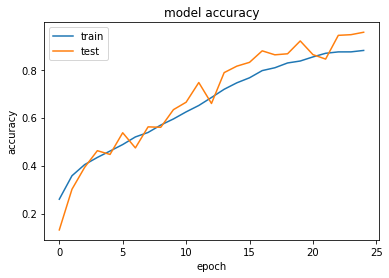

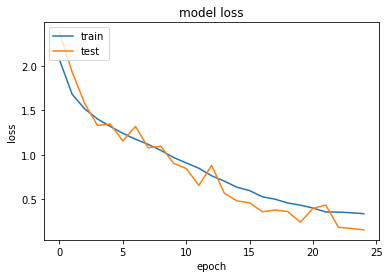

In [9]:
import matplotlib.pyplot as plt

# Visualizing the training process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
from keras.preprocessing import image


img_pred = image.load_img('Age/test/20-25/24_0_0_20170115230945548.jpg.chip.jpg',target_size = (100,100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
result = model.predict(img_pred)
[res] = result
if res[1] == np.amax(res):
  print ("8-14")
  age = "8-14"
elif res[2] == np.amax(res):
  print ("15-19")
  age = "15-19"
elif res[3] == np.amax(res):
  print ("20-25")
  age =  "20-25"
elif res[4] == np.amax(res):
  print ("26-32")
  age = "26-32"
elif res[5] == np.amax(res):
  print ("33-40")
  age = "33-40"
elif res[6] == np.amax(res):
  print ("41-48")
  age = "41-48"
elif res[7] == np.amax(res):
  print ("49-55")
  age = "49-55"
elif res[8] == np.amax(res):
  print ("56-62")
  age = "56-62"
elif res[9] == np.amax(res):
  print ("62+")
  age = "62+"
elif  res[0] == np.amax(res):
  print ("0-7")
  age = "0-7"

15-19


In [0]:
model.save("age95-88.h5")

In [0]:
|